In [16]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.cluster.vq import kmeans

%matplotlib inline

In [17]:
iris = datasets.load_iris()

X = iris['data']
y = iris.target

In [18]:
#Perform LDA on iris data
sklearn_lda = LinearDiscriminantAnalysis(n_components = 2)

X_lda = sklearn_lda.fit(X, y).transform(X)

In [34]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

In [43]:
X_lda_kmeans = pd.DataFrame(data = X_lda)

centroids = kmeans(X_lda, 3)

distance = [1e10]*len(X_lda)
ctr_label = [0]*len(X_lda)

for k, point in enumerate(X_lda):

    for i, center in enumerate(centroids[0]):

        target = 0
        for j, ctr_pt in enumerate(center):

            target = target + pow(point[j] - ctr_pt, 2)

        target = pow(target, 0.5)

        if target < distance[k]:
            distance[k] = target
            ctr_label[k] = i
    
X_lda_kmeans['distance'] = distance
X_lda_kmeans['ctr_label'] = ctr_label
X_lda_kmeans['ctr_label'] = X_lda_kmeans['ctr_label'].astype('category')

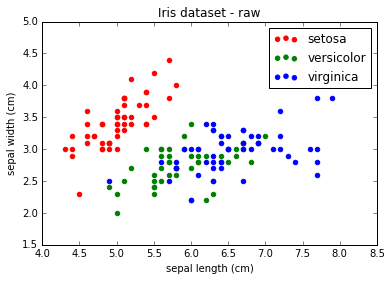

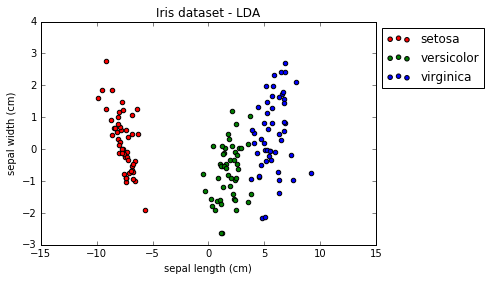

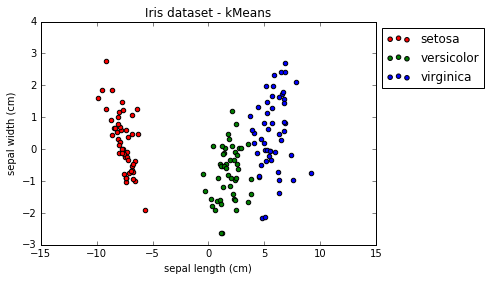

In [45]:
#Plot the raw, kNN and PCA results
cmap = ['red', 'green', 'blue']

plt.figure()
for i, name in enumerate(iris.target_names):
    X = iris.data[iris.target == i]

    plt.scatter(X[:, 0], X[:, 1], color = cmap[i])

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names)
plt.title('Iris dataset - raw')

plt.figure()
for name, color in enumerate(cmap):
    plt.scatter(X_lda[y == name, 0], 
                X_lda[y == name, 1],
                label = name,
                c = color)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.title('Iris dataset - LDA')

plt.figure()
for name, color in enumerate(cmap):
    plt.scatter(X_lda_kmeans[0].loc[X_lda_kmeans['ctr_label'] == name],
                X_lda_kmeans[1].loc[X_lda_kmeans['ctr_label'] == name],
                label = name,
                c = color)

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(iris.target_names, loc = 'upper left', bbox_to_anchor = (1, 1))
plt.title('Iris dataset - LDA kMeans')

In [ ]:
#Decomposing the data first allows better separation
#of the different flower groups.  kMeans and kNN
#struggled with categorizing versicolor and virginica
#due to the overlap in the data.  The decompositions
#project the data on different axes allowing better
#group separation.  Better group separation equates to
#better classifier performance.  For example, setosa 
#was always easily classified due to the distance
#between it and the other groups.